# Pymaceuticals Inc.
---

### Analysis

- I notice that there is a fairly strong positive correlation between mouse weight and average tumor volume. This can be seen by noticing that the correlation is 0.84, which is positive and above 0.7. This is reasonable since heavier mice are generally larger and thus it is understandable that the tumors of larger mice would have a greater volume.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_merged = pd.merge(study_results, mouse_metadata, how = 'inner', on = "Mouse ID")

# Display the data table for preview
mouse_data_merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
print(f"There are {len(mouse_data_merged['Mouse ID'].unique())} mice in the sample")

There are 249 mice in the sample


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_data_groupby1 = mouse_data_merged.groupby(by = 'Mouse ID')
mouse_id_duplicates = []
for index, values in mouse_data_groupby1["Timepoint"].value_counts().items():
    current_id = index[0]
    if values > 1 and current_id not in mouse_id_duplicates:
        mouse_id_duplicates.append(index[0])
        
print("The duplicates are:", mouse_id_duplicates)

The duplicates are: ['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data_merged.loc[mouse_data_merged["Mouse ID"] == mouse_id_duplicates[0]]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_no_dup = mouse_data_merged.loc[mouse_data_merged["Mouse ID"] != mouse_id_duplicates[0]]
mouse_data_no_dup.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
print(f"There are now {len(mouse_data_no_dup['Mouse ID'].unique())} mice after dropping the duplicates")

There are now 248 mice after dropping the duplicates


## Summary Statistics

In [20]:
#Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Make a separate series for each property

drug_regimen_group_by = mouse_data_no_dup.groupby(by = "Drug Regimen")

mean_tumor_vol = drug_regimen_group_by.mean(numeric_only = True)["Tumor Volume (mm3)"]

median_tumor_vol = drug_regimen_group_by.median(numeric_only = True)["Tumor Volume (mm3)"]

variance_tumor_vol = drug_regimen_group_by.var(numeric_only = True)["Tumor Volume (mm3)"]

st_dev_tumor_vol = drug_regimen_group_by.std(numeric_only = True)["Tumor Volume (mm3)"]

st_err_tumor_vol = drug_regimen_group_by.sem(numeric_only = True)["Tumor Volume (mm3)"]
                                                                      
# Assemble the resulting series into a single summary DataFrame

drug_summary = pd.concat(
        [mean_tumor_vol, 
        median_tumor_vol, 
        variance_tumor_vol, 
        st_dev_tumor_vol,
        st_err_tumor_vol], axis = 1)

drug_summary.columns = ["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance",\
                        "Tumor Volume Std. Dev.", "Tumor Volume Std. Err."]

drug_summary



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

drug_regimen_group_by.aggregate({"Tumor Volume (mm3)" : ['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

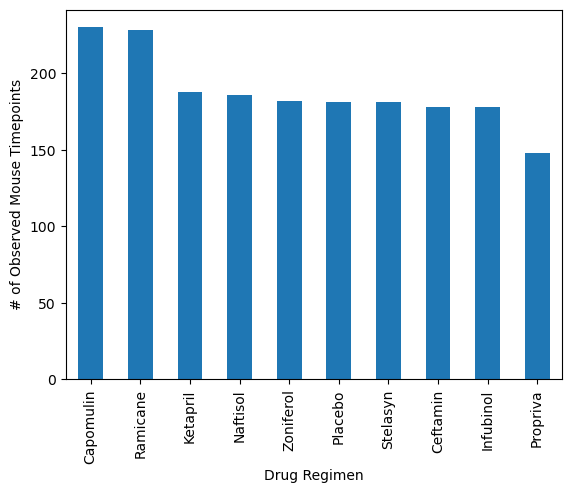

In [23]:
#Make a group by using mouse id with the no duplicate data
drug_regimen_timepoint = drug_regimen_group_by["Timepoint"].count()
drug_regimen_timepoint = drug_regimen_timepoint.sort_values(ascending = False)

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

bar_pandas = drug_regimen_timepoint.plot.bar()
bar_pandas.set_ylabel("# of Observed Mouse Timepoints")
bar_pandas

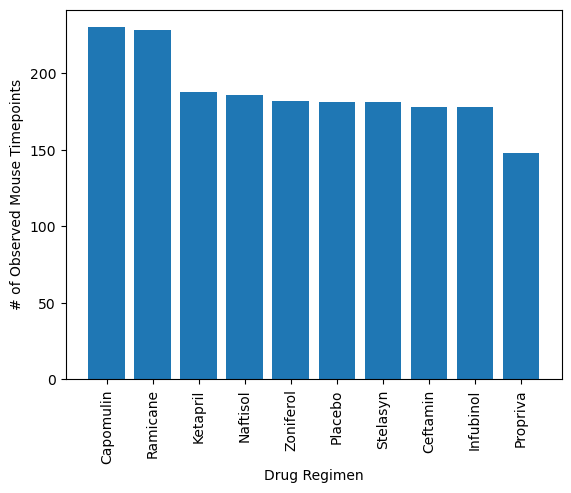

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_regimen_timepoint.index, drug_regimen_timepoint)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = 90)
plt.show()

<Axes: ylabel='Sex'>

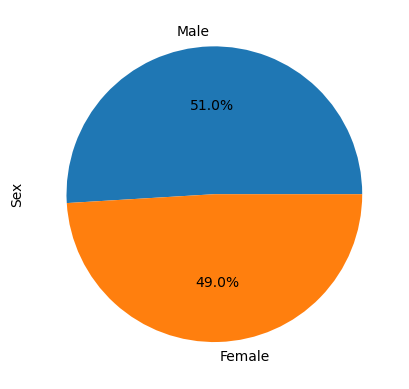

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_data_by_sex = mouse_data_no_dup["Sex"].value_counts()
mouse_data_by_sex
mouse_data_by_sex.plot(kind = "pie", autopct='%1.1f%%')

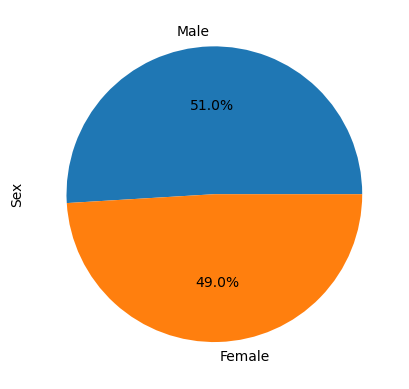

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot 
labels = ["Male", "Female"]
sex_counts = mouse_data_no_dup["Sex"].value_counts().values
sex_counts
plt.pie(sex_counts, labels = labels, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_data_by_id = mouse_data_no_dup.groupby(by = "Mouse ID")
mouse_data_max_timepoint = mouse_data_by_id["Timepoint"].max()
mouse_data_max_timepoint = mouse_data_max_timepoint.to_frame()
mouse_data_max_timepoint.columns = ["Max Timepoint"]

# Reset index
mouse_data_max_timepoint_reset = mouse_data_max_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_data_plus_last = pd.merge(mouse_data_no_dup, mouse_data_max_timepoint, how = 'inner', on = "Mouse ID")
mouse_data_final_tumor = mouse_data_plus_last.loc[mouse_data_plus_last["Timepoint"] \
                                                  == mouse_data_plus_last["Max Timepoint"]]


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]



# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []
# Create empty tumor dataframe
tumor_df = pd.DataFrame()

#Use for loop to loop over treatments
for treatment in treatments:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume_data = mouse_data_final_tumor.loc[\
                                                   mouse_data_final_tumor["Drug Regimen"] == treatment]\
                                                ["Tumor Volume (mm3)"]
    
    tumor_volume_data = tumor_volume_data.reset_index(drop = True)
    
    quantiles = tumor_volume_data.quantile([.25,.5,.75])
    Q_1 = quantiles[.25]
    Q_3 = quantiles[.75]
    iqr = Q_3 - Q_1
    
    #make an empty outliers list
    outliers = []
    
    
    # Determine outliers using upper and lower bounds
    upper_bound = Q_3+1.5*iqr
    lower_bound = Q_1-1.5*iqr
    for volume in tumor_volume_data:
        if volume > upper_bound or volume < lower_bound:
            outliers.append(volume)
    print(f"{treatment}'s potential outliers:", outliers)
    
    tumor_df[treatment] = tumor_volume_data



Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


Text(0, 0.5, 'Final Tumor Volume (mm3)')

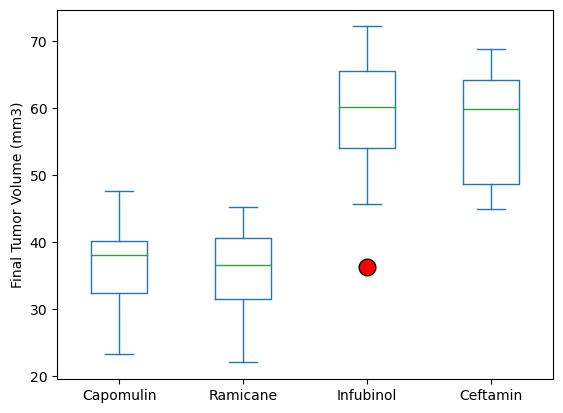

In [15]:
# generate a box plot using pandas to show the four distributions
graph = tumor_df.plot(kind = "box", flierprops = dict(marker='o', markerfacecolor='red', markersize=12))
graph.set_ylabel("Final Tumor Volume (mm3)")

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

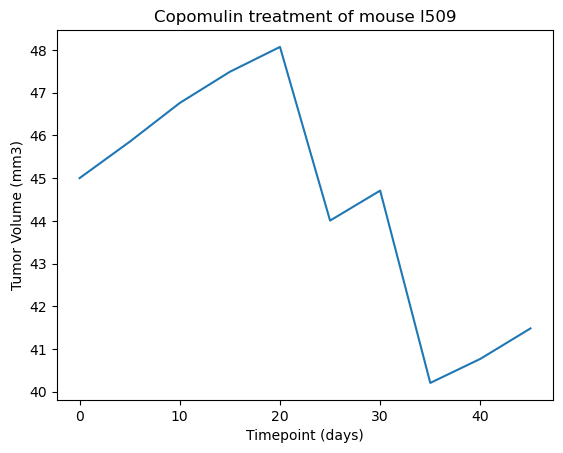

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
specific_tumor_data = mouse_data_merged.loc[mouse_data_merged["Mouse ID"] == "l509"]


line_graph = specific_tumor_data.plot.line("Timepoint", "Tumor Volume (mm3)",\
                                           title = "Copomulin treatment of mouse l509",\
                                          legend = False)
line_graph.set_xlabel("Timepoint (days)")
line_graph.set_ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

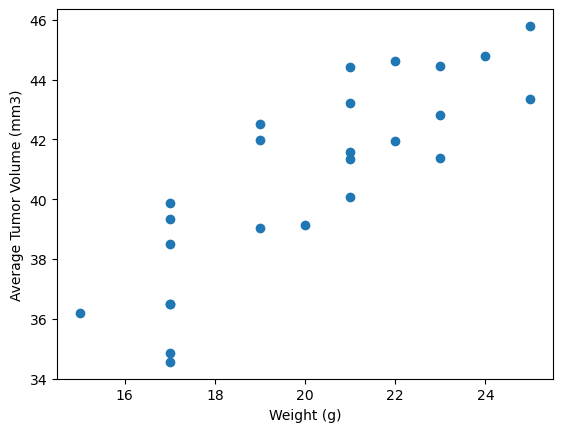

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_means = mouse_data_merged.loc[\
                                        mouse_data_merged["Drug Regimen"] == "Capomulin"\
                                       ].groupby("Mouse ID").mean(numeric_only = True)
weights = capomulin_means["Weight (g)"]
volumes = capomulin_means["Tumor Volume (mm3)"]
plt.scatter(weights, volumes)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = capomulin_means["Weight (g)"].corr(capomulin_means["Tumor Volume (mm3)"])

# print out the correlation statement
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation, 2)}")

The correlation between mouse weight and the average tumor volume is 0.84


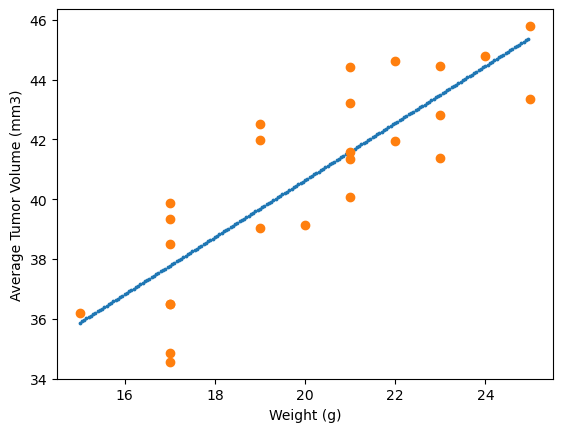

In [19]:
# Add the trend line to the existing plot
slope, constant = np.polyfit(weights, volumes, 1)

x_ticks = np.arange(min(weights),max(weights),.05)

vol_predicted = [slope*x+constant for x in x_ticks] 

plt.scatter(x_ticks, vol_predicted, s = 3)
plt.scatter(weights, volumes)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
